In [1]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [4]:
clf.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [7]:
from sklearn.metrics import(
confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,RocCurveDisplay,classification_report)

In [8]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n ",cm)


Confusion Matrix:
  [[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


In [9]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)

In [10]:
import matplotlib.pyplot as plt

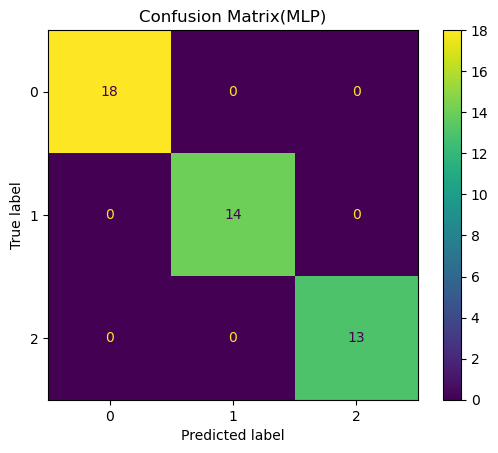

In [12]:
disp.plot()
plt.title("Confusion Matrix(MLP)")
plt.show()

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [15]:
print("\nClassification Report:\n",classification_report(y_test,y_pred,digits=3))


Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        18
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



In [17]:
print("\nClassification Report:\n",classification_report(y_test,y_pred,digits=3))


Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        18
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



In [20]:
y_scores=clf.predict_proba(X_test)[:,1]

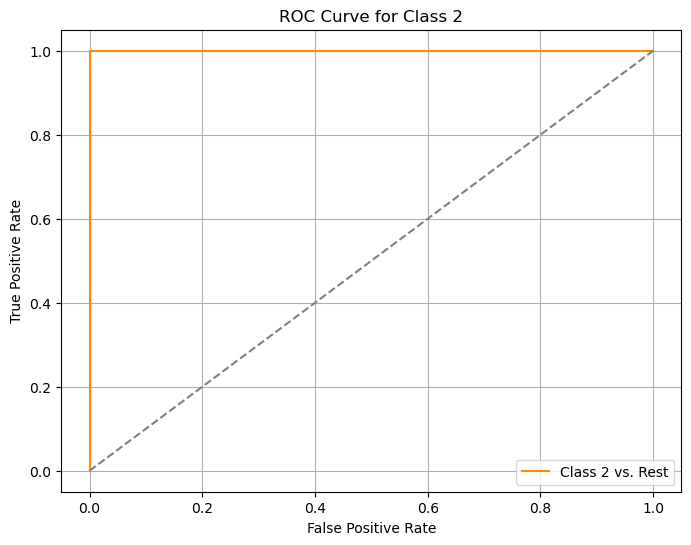

In [25]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Binarize the true labels — class 2 vs. rest
y_binary = (y_test == 2).astype(int)

# Step 2: Get predicted probabilities for class 2
# This assumes your model supports predict_proba
y_scores = clf.predict_proba(X_test)  # shape: (n_samples, n_classes)
y_score_class2 = y_scores[:, 2]         # scores for class 2

# Step 3: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_binary, y_score_class2)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Class 2 vs. Rest", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Class 2")
plt.legend()
plt.grid(True)
plt.show()